# NAME: ANKIT BANKOTI 

#                              SOURCES
# https://ourworldindata.org/grapher/population-density
#     https://ourworldindata.org/search?q=Population
#         https://www.thebalance.com/what-is-average-income-in-usa-family-household-history-3306189
#             https://fred.stlouisfed.org/series/MORTGAGE30US
#                 https://www.thebalance.com/prime-interest-rate-3305956

In [1489]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import  DecisionTreeRegressor

import xgboost as xgb

In [5]:
data = pd.read_csv('usa\CSUSHPISA.csv')

In [6]:
data.tail()

,DATE,CSUSHPISA
420,2022-01-01,284.767
421,2022-02-01,290.371
422,2022-03-01,296.496
423,2022-04-01,301.704
424,2022-05-01,304.831


In [7]:
filtered_df = data.loc[(data['DATE'] >= '2000-01-01')
                     & (data['DATE'] <= '2020-01-01')]

In [8]:
filtered_df.head()

,DATE,CSUSHPISA
156,2000-01-01,100.552
157,2000-02-01,101.339
158,2000-03-01,102.127
159,2000-04-01,102.922
160,2000-05-01,103.677


In [9]:
df1 = filtered_df.loc[filtered_df['DATE'].isin(['2016-01-01','2001-01-01','2002-01-01','2003-01-01',
                                         '2004-01-01','2005-01-01','2006-01-01','2007-01-01',
                                         '2008-01-01','2009-01-01','2010-01-01','2011-01-01',
                                         '2012-01-01','2013-01-01','2014-01-01','2015-01-01',
                                         '2017-01-01','2018-01-01','2019-01-01','2020-01-01'])]

In [10]:
df1

,DATE,CSUSHPISA
168,2001-01-01,109.846
180,2002-01-01,117.143
192,2003-01-01,128.461
204,2004-01-01,141.646
216,2005-01-01,161.288
228,2006-01-01,182.320
240,2007-01-01,184.518
252,2008-01-01,173.133
264,2009-01-01,151.504
276,2010-01-01,147.395


In [11]:
 df1['DATE'] = pd.DatetimeIndex(df1['DATE']).year

C:\Users\ankit\AppData\Local\Temp/ipykernel_4960/3376800223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['DATE'] = pd.DatetimeIndex(df1['DATE']).year


In [12]:
df1

,DATE,CSUSHPISA
168,2001,109.846
180,2002,117.143
192,2003,128.461
204,2004,141.646
216,2005,161.288
228,2006,182.320
240,2007,184.518
252,2008,173.133
264,2009,151.504
276,2010,147.395


In [13]:
df1.rename({'DATE':'Year'}, axis='columns', inplace=True)

C:\Users\ankit\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [14]:
data2 = pd.read_csv('usa\population-density.csv')

In [15]:
data2.head()

,Entity,Code,Year,population_density
0,Afghanistan,AFG,-10000,0.023
1,Afghanistan,AFG,-9000,0.031
2,Afghanistan,AFG,-8000,0.043
3,Afghanistan,AFG,-7000,0.060
4,Afghanistan,AFG,-6000,0.083


In [16]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69379 entries, 0 to 69378
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Entity              69379 non-null  object 
 1   Code                69041 non-null  object 
 2   Year                69379 non-null  int64  
 3   population_density  69379 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.1+ MB


In [17]:
data2 = data2[data2['Code'].str.contains('USA', na=False)]

In [18]:
data2 = data2.loc[(data2['Year'] >= 2001)
                     & (data2['Year'] <= 2020)]

In [19]:
data2

,Entity,Code,Year,population_density
66059,United States,USA,2001,31.113
66060,United States,USA,2002,31.406
66061,United States,USA,2003,31.683
66062,United States,USA,2004,31.960
66063,United States,USA,2005,32.249
66064,United States,USA,2006,32.551
66065,United States,USA,2007,32.863
66066,United States,USA,2008,33.177
66067,United States,USA,2009,33.486
66068,United States,USA,2010,33.781


In [20]:
data3 = pd.read_csv('usa\populationus.csv')

In [21]:
data3.head()

,Entity,Code,Year,Population (historical estimates and future projections)
0,Afghanistan,AFG,-10000,14737
1,Afghanistan,AFG,-9000,20405
2,Afghanistan,AFG,-8000,28253
3,Afghanistan,AFG,-7000,39120
4,Afghanistan,AFG,-6000,54166


In [22]:
data3 = data3[data3['Code'].str.contains('USA', na=False)]
data3 = data3.loc[(data3['Year'] >= 2001)
                     & (data3['Year'] <= 2020)]

In [23]:
data3

,Entity,Code,Year,Population (historical estimates and future projections)
70810,United States,USA,2001,284607992
70811,United States,USA,2002,287279312
70812,United States,USA,2003,289815567
70813,United States,USA,2004,292354663
70814,United States,USA,2005,294993509
70815,United States,USA,2006,297758977
70816,United States,USA,2007,300608425
70817,United States,USA,2008,303486022
70818,United States,USA,2009,306307565
70819,United States,USA,2010,309011469


In [24]:
dfff = data3.merge(data2,how='left')

In [25]:
dfff

,Entity,Code,Year,Population (historical estimates and future projections),population_density
0,United States,USA,2001,284607992,31.113
1,United States,USA,2002,287279312,31.406
2,United States,USA,2003,289815567,31.683
3,United States,USA,2004,292354663,31.960
4,United States,USA,2005,294993509,32.249
5,United States,USA,2006,297758977,32.551
6,United States,USA,2007,300608425,32.863
7,United States,USA,2008,303486022,33.177
8,United States,USA,2009,306307565,33.486
9,United States,USA,2010,309011469,33.781


In [26]:
data4 = pd.read_csv(r'usa\unemploymentrate.csv')

In [27]:
data4.head()

,Entity,Code,Year,"Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Afghanistan,AFG,1991,10.649
1,Afghanistan,AFG,1992,10.821
2,Afghanistan,AFG,1993,10.723
3,Afghanistan,AFG,1994,10.726
4,Afghanistan,AFG,1995,11.179


In [28]:
data4 = data4[data4['Code'].str.contains('USA', na=False)]
data4 = data4.loc[(data4['Year'] >= 2001)
                     & (data4['Year'] <= 2020)]

In [29]:
data4

,Entity,Code,Year,"Unemployment, total (% of total labor force) (modeled ILO estimate)"
5900,United States,USA,2001,4.73
5901,United States,USA,2002,5.78
5902,United States,USA,2003,5.99
5903,United States,USA,2004,5.53
5904,United States,USA,2005,5.08
5905,United States,USA,2006,4.62
5906,United States,USA,2007,4.62
5907,United States,USA,2008,5.78
5908,United States,USA,2009,9.25
5909,United States,USA,2010,9.63


In [30]:
data5 = pd.read_csv(r'usa\usavgincome.csv')

In [31]:
data5.head()

,DATE,Income,Change,GDP Growth,Jobless Rate,Events
0,2020.0,67521.0,-2.93%,-3.40459,6.7,Global pandemic
1,2019.0,69560.0,6.81%,2.28887,3.6,Goldilocks economy
2,2018.0,65127.0,0.88%,2.91886,3.9,Trump tax cuts
3,2017.0,64557.0,1.37%,2.25568,4.1,Dollar weakened
4,2016.0,63683.0,3.13%,1.66747,4.7,Presidential race


In [32]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          21 non-null     float64
 1   Income        21 non-null     float64
 2   Change        21 non-null     object 
 3   GDP Growth    21 non-null     float64
 4   Jobless Rate  22 non-null     object 
 5   Events        21 non-null     object 
dtypes: float64(3), object(3)
memory usage: 1.2+ KB


In [33]:
data5 = data5.loc[(data5['DATE'] >= 2001)
                     & (data5['DATE'] <= 2020)]

In [34]:
data5

,DATE,Income,Change,GDP Growth,Jobless Rate,Events
0,2020.0,67521.0,-2.93%,-3.40459,6.7,Global pandemic
1,2019.0,69560.0,6.81%,2.28887,3.6,Goldilocks economy
2,2018.0,65127.0,0.88%,2.91886,3.9,Trump tax cuts
3,2017.0,64557.0,1.37%,2.25568,4.1,Dollar weakened
4,2016.0,63683.0,3.13%,1.66747,4.7,Presidential race
5,2015.0,61748.0,5.15%,2.70637,5,Natural jobless rate
6,2014.0,58725.0,-1.53%,2.28778,5.6,Strong dollar
7,2013.0,59640.0,3.50%,1.84187,6.7,LFPR drops
8,2012.0,57623.0,-0.19%,2.28069,7.9,Fiscal cliff
9,2011.0,57732.0,-1.53%,1.54990,8.5,Austerity measures


In [35]:
data5['DATE'] = data5['DATE'].astype('int64')

In [36]:
data5

,DATE,Income,Change,GDP Growth,Jobless Rate,Events
0,2020,67521.0,-2.93%,-3.40459,6.7,Global pandemic
1,2019,69560.0,6.81%,2.28887,3.6,Goldilocks economy
2,2018,65127.0,0.88%,2.91886,3.9,Trump tax cuts
3,2017,64557.0,1.37%,2.25568,4.1,Dollar weakened
4,2016,63683.0,3.13%,1.66747,4.7,Presidential race
5,2015,61748.0,5.15%,2.70637,5,Natural jobless rate
6,2014,58725.0,-1.53%,2.28778,5.6,Strong dollar
7,2013,59640.0,3.50%,1.84187,6.7,LFPR drops
8,2012,57623.0,-0.19%,2.28069,7.9,Fiscal cliff
9,2011,57732.0,-1.53%,1.54990,8.5,Austerity measures


In [37]:
data5.rename({'DATE':'Year'}, axis='columns', inplace=True)

In [38]:
data5

,Year,Income,Change,GDP Growth,Jobless Rate,Events
0,2020,67521.0,-2.93%,-3.40459,6.7,Global pandemic
1,2019,69560.0,6.81%,2.28887,3.6,Goldilocks economy
2,2018,65127.0,0.88%,2.91886,3.9,Trump tax cuts
3,2017,64557.0,1.37%,2.25568,4.1,Dollar weakened
4,2016,63683.0,3.13%,1.66747,4.7,Presidential race
5,2015,61748.0,5.15%,2.70637,5,Natural jobless rate
6,2014,58725.0,-1.53%,2.28778,5.6,Strong dollar
7,2013,59640.0,3.50%,1.84187,6.7,LFPR drops
8,2012,57623.0,-0.19%,2.28069,7.9,Fiscal cliff
9,2011,57732.0,-1.53%,1.54990,8.5,Austerity measures


In [39]:
dffff = data4.merge(data5,how='left')

In [40]:
dffff

,Entity,Code,Year,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Income,Change,GDP Growth,Jobless Rate,Events
0,United States,USA,2001,4.73,61889.0,-2.22%,0.95434,5.7,Recession
1,United States,USA,2002,5.78,61190.0,-1.13%,1.69594,6,War on Terror
2,United States,USA,2003,5.99,61113.0,-0.13%,2.79621,5.7,JGTRRA
3,United States,USA,2004,5.53,60901.0,-0.35%,3.85255,5.4,Business growth
4,United States,USA,2005,5.08,61553.0,1.07%,3.48322,4.9,Incomes improved
5,United States,USA,2006,4.62,62033.0,0.78%,2.78281,4.4,Fed raised rates
6,United States,USA,2007,4.62,62865.0,1.34%,2.01051,5,Subprime crisis
7,United States,USA,2008,5.78,60624.0,-3.56%,0.12219,7.3,Recession
8,United States,USA,2009,9.25,60200.0,-0.70%,-2.59989,9.9,ARRA
9,United States,USA,2010,9.63,58627.0,-2.61%,2.70886,9.3,Obama tax cuts


In [41]:
dff = dfff.merge(dffff,how='left')

In [42]:
dff

,Entity,Code,Year,Population (historical estimates and future projections),population_density,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Income,Change,GDP Growth,Jobless Rate,Events
0,United States,USA,2001,284607992,31.113,4.73,61889.0,-2.22%,0.95434,5.7,Recession
1,United States,USA,2002,287279312,31.406,5.78,61190.0,-1.13%,1.69594,6,War on Terror
2,United States,USA,2003,289815567,31.683,5.99,61113.0,-0.13%,2.79621,5.7,JGTRRA
3,United States,USA,2004,292354663,31.960,5.53,60901.0,-0.35%,3.85255,5.4,Business growth
4,United States,USA,2005,294993509,32.249,5.08,61553.0,1.07%,3.48322,4.9,Incomes improved
5,United States,USA,2006,297758977,32.551,4.62,62033.0,0.78%,2.78281,4.4,Fed raised rates
6,United States,USA,2007,300608425,32.863,4.62,62865.0,1.34%,2.01051,5,Subprime crisis
7,United States,USA,2008,303486022,33.177,5.78,60624.0,-3.56%,0.12219,7.3,Recession
8,United States,USA,2009,306307565,33.486,9.25,60200.0,-0.70%,-2.59989,9.9,ARRA
9,United States,USA,2010,309011469,33.781,9.63,58627.0,-2.61%,2.70886,9.3,Obama tax cuts


In [43]:
main_df = dff.merge(df1,how='left')

In [44]:
main_df

,Entity,Code,Year,Population (historical estimates and future projections),population_density,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Income,Change,GDP Growth,Jobless Rate,Events,CSUSHPISA
0,United States,USA,2001,284607992,31.113,4.73,61889.0,-2.22%,0.95434,5.7,Recession,109.846
1,United States,USA,2002,287279312,31.406,5.78,61190.0,-1.13%,1.69594,6,War on Terror,117.143
2,United States,USA,2003,289815567,31.683,5.99,61113.0,-0.13%,2.79621,5.7,JGTRRA,128.461
3,United States,USA,2004,292354663,31.960,5.53,60901.0,-0.35%,3.85255,5.4,Business growth,141.646
4,United States,USA,2005,294993509,32.249,5.08,61553.0,1.07%,3.48322,4.9,Incomes improved,161.288
5,United States,USA,2006,297758977,32.551,4.62,62033.0,0.78%,2.78281,4.4,Fed raised rates,182.320
6,United States,USA,2007,300608425,32.863,4.62,62865.0,1.34%,2.01051,5,Subprime crisis,184.518
7,United States,USA,2008,303486022,33.177,5.78,60624.0,-3.56%,0.12219,7.3,Recession,173.133
8,United States,USA,2009,306307565,33.486,9.25,60200.0,-0.70%,-2.59989,9.9,ARRA,151.504
9,United States,USA,2010,309011469,33.781,9.63,58627.0,-2.61%,2.70886,9.3,Obama tax cuts,147.395


In [45]:
main_df.isnull().sum()

Entity                                                                 0
Code                                                                   0
Year                                                                   0
Population (historical estimates and future projections)               0
population_density                                                     0
Unemployment, total (% of total labor force) (modeled ILO estimate)    0
Income                                                                 0
Change                                                                 0
GDP Growth                                                             0
Jobless Rate                                                           0
Events                                                                 0
CSUSHPISA                                                              0
dtype: int64

In [46]:
main_df = main_df.drop(['Entity', 'Code', 'Events'], axis=1)

In [47]:
main_df['Change'] = main_df['Change'].str.rstrip("%").astype(float)/100

In [48]:
main_df

,Year,Population (historical estimates and future projections),population_density,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Income,Change,GDP Growth,Jobless Rate,CSUSHPISA
0,2001,284607992,31.113,4.73,61889.0,-0.0222,0.95434,5.7,109.846
1,2002,287279312,31.406,5.78,61190.0,-0.0113,1.69594,6,117.143
2,2003,289815567,31.683,5.99,61113.0,-0.0013,2.79621,5.7,128.461
3,2004,292354663,31.960,5.53,60901.0,-0.0035,3.85255,5.4,141.646
4,2005,294993509,32.249,5.08,61553.0,0.0107,3.48322,4.9,161.288
5,2006,297758977,32.551,4.62,62033.0,0.0078,2.78281,4.4,182.320
6,2007,300608425,32.863,4.62,62865.0,0.0134,2.01051,5,184.518
7,2008,303486022,33.177,5.78,60624.0,-0.0356,0.12219,7.3,173.133
8,2009,306307565,33.486,9.25,60200.0,-0.0070,-2.59989,9.9,151.504
9,2010,309011469,33.781,9.63,58627.0,-0.0261,2.70886,9.3,147.395


In [49]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Year                                                                 20 non-null     int64  
 1   Population (historical estimates and future projections)             20 non-null     int64  
 2   population_density                                                   20 non-null     float64
 3   Unemployment, total (% of total labor force) (modeled ILO estimate)  20 non-null     float64
 4   Income                                                               20 non-null     float64
 5   Change                                                               20 non-null     float64
 6   GDP Growth                                                           20 non-null     float64
 7   Jobless Rat

In [50]:
main_df['Jobless Rate'] = main_df['Jobless Rate'].astype(float)/100

In [51]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Year                                                                 20 non-null     int64  
 1   Population (historical estimates and future projections)             20 non-null     int64  
 2   population_density                                                   20 non-null     float64
 3   Unemployment, total (% of total labor force) (modeled ILO estimate)  20 non-null     float64
 4   Income                                                               20 non-null     float64
 5   Change                                                               20 non-null     float64
 6   GDP Growth                                                           20 non-null     float64
 7   Jobless Rat

In [52]:
main_df.rename({'CSUSHPISA':'Price'}, axis='columns', inplace=True)


In [53]:
main_df.rename({'Population (historical estimates and future projections)':'Population'}, axis='columns', inplace=True)
main_df.rename({'Unemployment, total (% of total labor force) (modeled ILO estimate)':'Unemployment'}, axis='columns', inplace=True)

In [54]:
main_df.rename({'GDP Growth':'GDP_Growth'}, axis='columns', inplace=True)
main_df.rename({'Jobless Rate':'Jobless_Rate'}, axis='columns', inplace=True)

In [55]:
main_df.describe()

,Year,Population,population_density,Unemployment,Income,Change,GDP_Growth,Jobless_Rate,Price
count,20.00000,2.000000e+01,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,2010.50000,3.091534e+08,33.796800,6.085000,61845.550000,0.003575,1.709982,0.060150,161.794250
std,5.91608,1.474864e+07,1.612304,1.829586,3079.320781,0.026971,1.817625,0.017854,28.883412
min,2001.00000,2.846080e+08,31.113000,3.670000,57623.000000,-0.035600,-3.404590,0.036000,109.846000
25%,2005.75000,2.970676e+08,32.475500,4.702500,60060.000000,-0.015300,1.638078,0.048500,141.616000
50%,2010.50000,3.102978e+08,33.922000,5.655000,61371.500000,-0.001600,2.268185,0.056500,161.618000
75%,2015.25000,3.214127e+08,35.137250,7.540000,63069.500000,0.013475,2.727348,0.068500,182.869500
max,2020.00000,3.310026e+08,36.185000,9.630000,69560.000000,0.068100,3.852550,0.099000,214.490000


In [402]:
main = main_df.copy(deep=True)

Min HPI is 109
,Max HPI is 214
,Mean and Median House Price Indx are almost same to 161

In [403]:
#function for getting boxplot for all numerical columns
def graphsuni(data,columns=None,directory=os.getcwd()):
    cols=data.columns
    if columns==None:
        columns=cols
    path = os.chdir(directory)
    num_cols = data._get_numeric_data().columns
    num_cols = num_cols.tolist()
    for i in columns:
        if (i in num_cols):               
                data.boxplot(column=i,notch =True,grid=False,figsize=(6,4),vert=False)
                plt.xlabel(i,fontsize=12)
                str1 = "Boxplot of "+i
                plt.title(str1,fontsize=14)
                # plt.savefig(str1,bbox_inches='tight',pad_inches=2,transparent=False,dpi=100)
                plt.show()

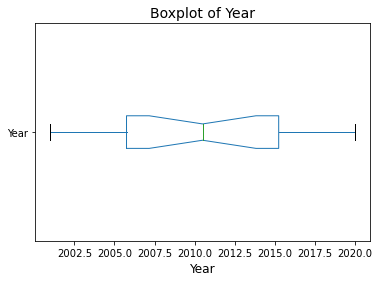

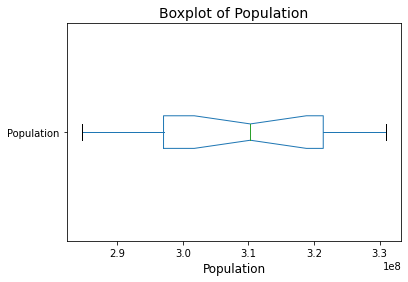

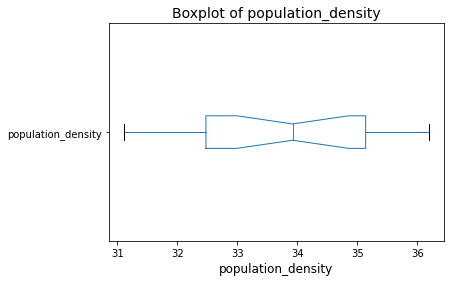

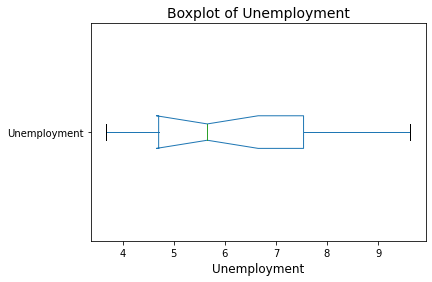

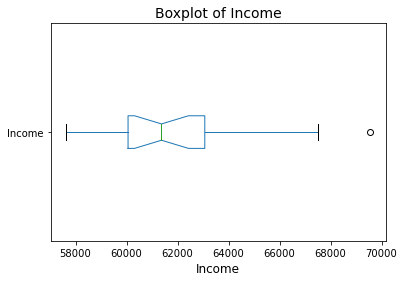

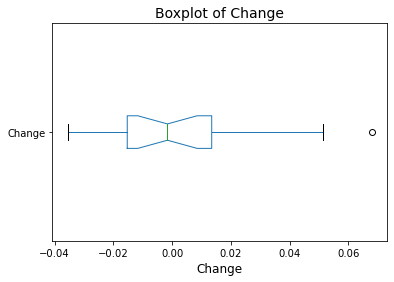

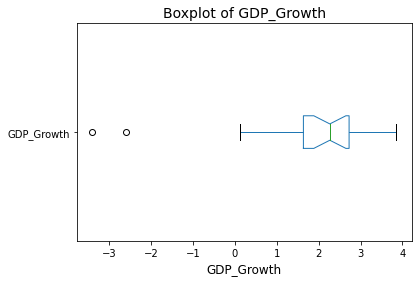

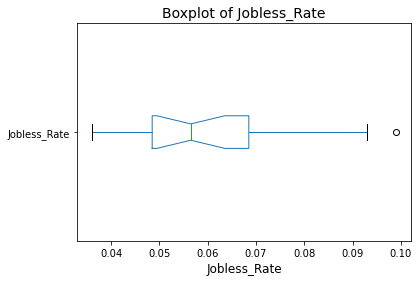

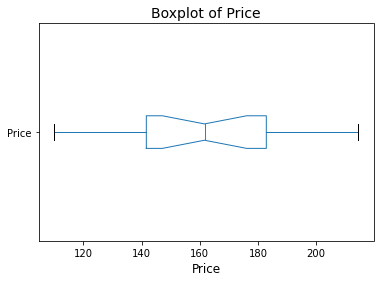

In [404]:
graphsuni(main)

In [423]:
IQR2 = main.Income.quantile(0.75)- main.Income.quantile(0.25)
upper2 = main.Income.quantile(0.75) + 1.5*IQR2   #Q1 + 1.5*IQR
lower2 = main.Income.quantile(0.25) - 1.5*IQR2   #Q1 - 1.5*IQR
outliers2=sum(main.Income > upper2)
print(outliers2)

1


In [422]:
median2 = main['Income'].median()
main["Income"] = np.where(main["Income"] >upper2, median2,main['Income'])

In [421]:
IQR3 = main.Change.quantile(0.75)- main.Change.quantile(0.25)
upper3 = main.Change.quantile(0.75) + 1.5*IQR3   #Q1 + 1.5*IQR
lower3 = main.Change.quantile(0.25) - 1.5*IQR3   #Q1 - 1.5*IQR
outliers3=sum(main.Change > upper3)
print(outliers3)

0


In [420]:
median3 = main['Change'].median()
main["Change"] = np.where(main["Change"] >upper3, median3,main['Change'])

In [415]:
IQR4 = main.GDP_Growth.quantile(0.75)- main.GDP_Growth.quantile(0.25)
upper4 = main.GDP_Growth.quantile(0.75) + 1.5*IQR4   #Q1 + 1.5*IQR
lower4 = main.GDP_Growth.quantile(0.25) - 1.5*IQR4   #Q1 - 1.5*IQR
outliers4=sum(main.GDP_Growth < lower4)
print(outliers4)

0


In [414]:
median4 = main['GDP_Growth'].median()
main["GDP_Growth"] = np.where(main["GDP_Growth"] <lower4, median4,main['GDP_Growth'])

In [418]:
IQR5 = main.Jobless_Rate.quantile(0.75)- main.Jobless_Rate.quantile(0.25)
upper5 = main.Jobless_Rate.quantile(0.75) + 1.5*IQR5   #Q1 + 1.5*IQR
lower5 = main.Jobless_Rate.quantile(0.25) - 1.5*IQR5   #Q1 - 1.5*IQR
outliers5=sum(main.Jobless_Rate > upper5)
print(outliers5)

0


In [417]:
median5 = main['Jobless_Rate'].median()
main["Jobless_Rate"] = np.where(main["Jobless_Rate"] >upper5, median5,main['Jobless_Rate'])

In [424]:
# checking outliers for Income
IQR2 = main.Income.quantile(0.75)- main.Income.quantile(0.25)
upper2 = main.Income.quantile(0.75) + 1.5*IQR2   #Q1 + 1.5*IQR
lower2 = main.Income.quantile(0.25) - 1.5*IQR2   #Q1 - 1.5*IQR
outliers2=sum(main.Income > upper2)
print(outliers2)

# checking outliers for change
IQR3 = main.Change.quantile(0.75)- main.Change.quantile(0.25)
upper3 = main.Change.quantile(0.75) + 1.5*IQR3   #Q1 + 1.5*IQR
lower3 = main.Change.quantile(0.25) - 1.5*IQR3   #Q1 - 1.5*IQR
outliers3=sum(main.Change > upper3)
print(outliers3)

# checking outliers for growth rate
IQR4 = main.GDP_Growth.quantile(0.75)- main.GDP_Growth.quantile(0.25)
upper4 = main.GDP_Growth.quantile(0.75) + 1.5*IQR4   #Q1 + 1.5*IQR
lower4 = main.GDP_Growth.quantile(0.25) - 1.5*IQR4   #Q1 - 1.5*IQR
outliers4=sum(main.GDP_Growth < lower4)
print(outliers4)

# checking outliers for jobless_rate
IQR5 = main.Jobless_Rate.quantile(0.75)- main.Jobless_Rate.quantile(0.25)
upper5 = main.Jobless_Rate.quantile(0.75) + 1.5*IQR5   #Q1 + 1.5*IQR
lower5 = main.Jobless_Rate.quantile(0.25) - 1.5*IQR5   #Q1 - 1.5*IQR
outliers5=sum(main.Jobless_Rate > upper5)
print(outliers5)

1
0
0
0


# AFTER replacing outliers with median values we get box plot with no outliers

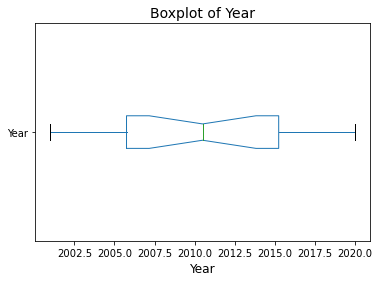

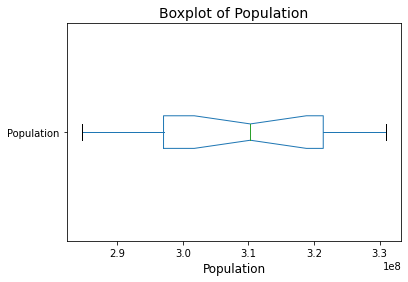

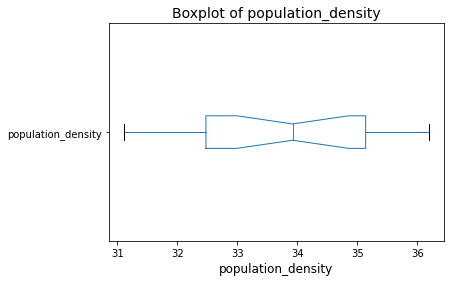

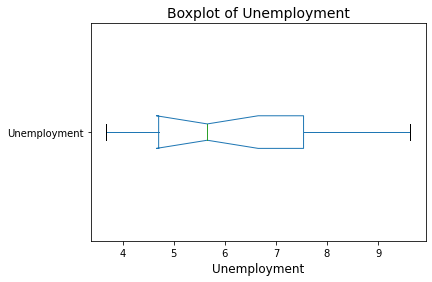

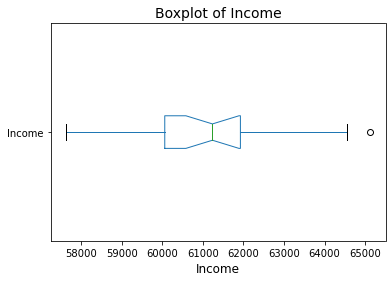

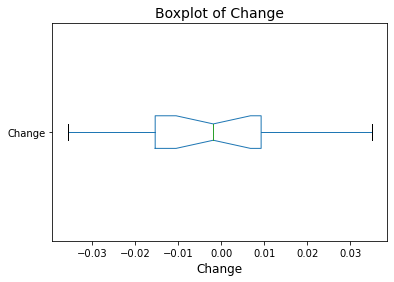

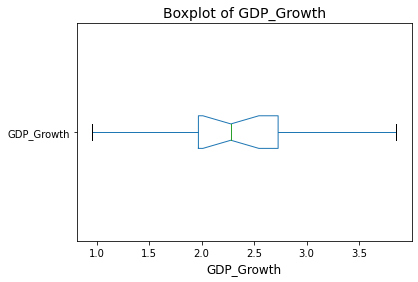

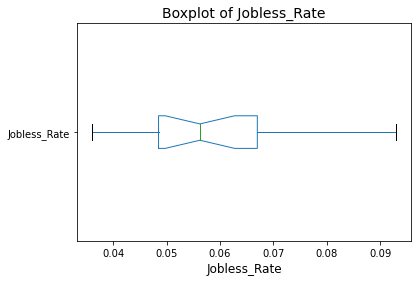

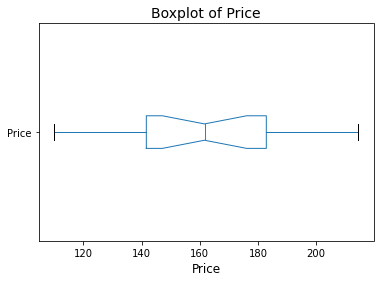

In [425]:
graphsuni(main)

# 1. Population is uniformally distributed and 50% of data is concentrated between 2.970676e+08 and 3.214127e+08
# 2. Unemployment shows Negatively Skewed Distribution and 50% data is concentrated between 4.702500 and 7.540000 having median value of 5.655000
# 3. % change is uniformally distributed with min value of -0.035600 , max value of 0.068100 and having mean = 0.003575.
# 4. Income is right skewed with 50th percentile to 75% percentile values ranging from 61371.500000 to 63069.500000.
# 5. Jobless rate is negatively skewed with median of 0.056500 and 25th and 75th percentile values of 0.048500 and 0.068500 . Max jobless rate is 0.099000 and min jobless rate is 0.036000.
# 6. Price is uniformally distributed with median value of 161.618000 and mean value of 161.794250

In [426]:
def graphs(data,columns=None,directory=os.getcwd()):
    cols=data.columns
    if columns==None:
        columns=cols
    print(columns)
    path = os.chdir(directory)
    num_cols = data._get_numeric_data().columns
    num_cols = num_cols.tolist()
    for i in num_cols:
        data.plot.scatter(y=['Price'],x=i,s=10)
        plt.xlabel(i,fontsize=12)
        plt.ylabel("Price",fontsize=12)
        str1 = "Scatterplot of "+i
        plt.title(str1,fontsize=14)
        # plt.savefig(str1,bbox_inches='tight',pad_inches=2,transparent=False,dpi=100)
        plt.show()

Index(['Year', 'Population', 'population_density', 'Unemployment', 'Income',
       'Change', 'GDP_Growth', 'Jobless_Rate', 'Price'],
      dtype='object')


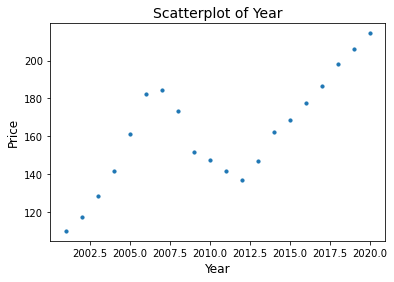

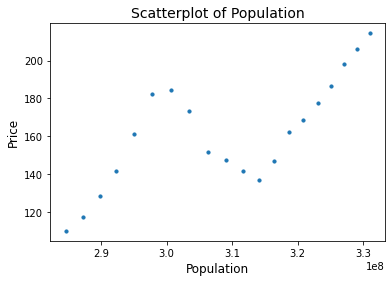

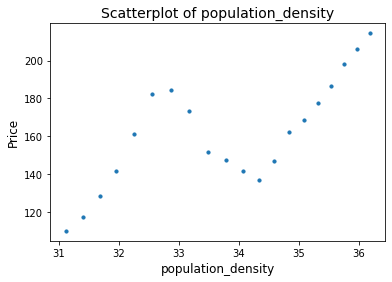

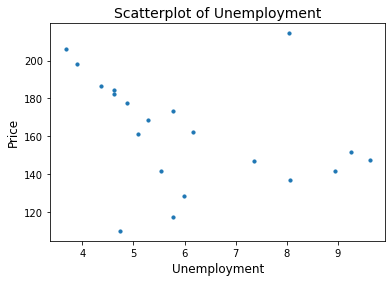

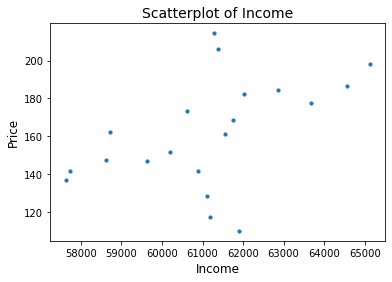

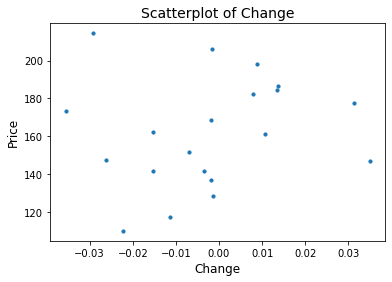

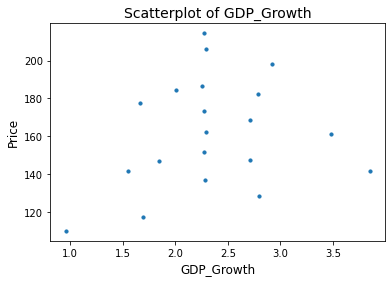

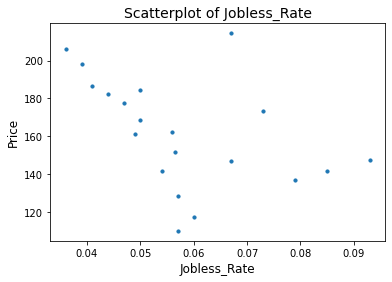

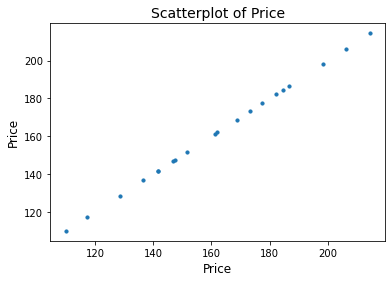

In [427]:
graphs(main)

# 1. As unemployment increases house price decreases, there is -ve correlation
# 2. As income increases the HP inceases drastically.
# 3. When there is -ve change the house price decreases and when there is +ve change house price increases for a while then it remains constant and gets adjusted in further +ve change
# 4. As gdp growth rate increases to 2.5 from 1.0 there is +ve correlation and when gdp further increases to 3.5 the price have -ve correlation.
# 5. The jobless Rate have -ve polynomial correlation with price and it reduces till jobless rate is 0.06 and then slightly increases to 1/3rd of price till 0.09

In [428]:
main.columns

Index(['Year', 'Population', 'population_density', 'Unemployment', 'Income',
       'Change', 'GDP_Growth', 'Jobless_Rate', 'Price'],
      dtype='object')

In [429]:
corr_matrix=main.corr()
corr_matrix["Price"].sort_values(ascending=False)

Price                 1.000000
Year                  0.746852
Population            0.727162
population_density    0.727157
Income                0.478071
GDP_Growth            0.221161
Change                0.158462
Unemployment         -0.328407
Jobless_Rate         -0.447151
Name: Price, dtype: float64

In [430]:
corr_features =[]

for i , r in main.corr().iterrows():
    k=0
    for j in range(len(r)):
        if i!= r.index[k]:
            if r.values[k] >=0.5:
                corr_features.append([i, r.index[k], r.values[k]])
        k += 1
corr_features

[['Year', 'Population', 0.9981989487001622],
 ['Year', 'population_density', 0.9981966845118416],
 ['Year', 'Price', 0.7468516366327956],
 ['Population', 'Year', 0.9981989487001622],
 ['Population', 'population_density', 0.9999999740989051],
 ['Population', 'Price', 0.7271620403127477],
 ['population_density', 'Year', 0.9981966845118416],
 ['population_density', 'Population', 0.9999999740989051],
 ['population_density', 'Price', 0.7271570197960345],
 ['Unemployment', 'Jobless_Rate', 0.8457944070525603],
 ['Jobless_Rate', 'Unemployment', 0.8457944070525603],
 ['Price', 'Year', 0.7468516366327956],
 ['Price', 'Population', 0.7271620403127477],
 ['Price', 'population_density', 0.7271570197960345]]

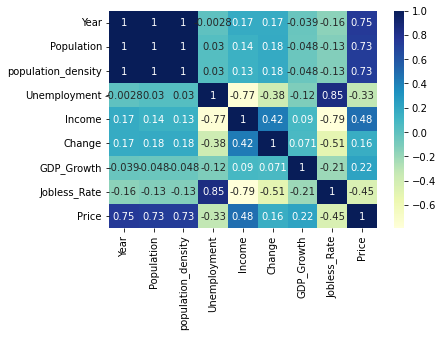

In [431]:
viz = sns.heatmap(main.corr(), cmap="YlGnBu",annot=True)

# 1.Here we can see that Year, Population, Population_density are highly correlated so we will keep only one feature among them we keep Population

# 2.Unemployment and Jobless Rate are also highly correlated so we keep only Unemployment 

# 3.SO final features are Population, Income, Change, GDP Growth and Unemployment

# Final Features selected

In [432]:
main2 = main[["Population", "Income", "Change", "GDP_Growth", 'Jobless_Rate',"Price"]]

# OLS MODELS

In [1252]:
x = main2[["Population"]]
y = main['Price']
# standardisation
scaler = StandardScaler()
x = scaler.fit_transform(x)
#adding constant
x = sm.add_constant(x)
#train test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.33,random_state=3 )

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
# creating model
model = sm.OLS(y_train,x_train)
#fitting the model
model = model.fit()
# executing model
model
#printing model summary
print(model.summary())

y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

r2_train = np.abs(r2_score(y_train,y_pred_train))
print("r2_train:", r2_train)
r2_test = np.abs(r2_score(y_test, y_pred_test))
print("r2_test :", r2_test)

print(np.sqrt(mean_squared_error(y_train,y_pred_train)))
print(np.sqrt(mean_squared_error(y_test,y_pred_test)))

(13, 2)
(13,)
(7, 2)
(7,)
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     10.17
Date:                Thu, 01 Sep 2022   Prob (F-statistic):            0.00862
Time:                        01:55:39   Log-Likelihood:                -57.527
No. Observations:                  13   AIC:                             119.1
Df Residuals:                      11   BIC:                             120.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        158.7590     

Text(0, 0.5, 'Predicted')

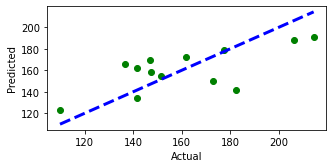

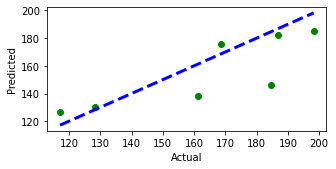

In [1277]:
plt.figure(figsize =(5,5))
plt.subplot(2,1,1)
plt.scatter(y_train,y_pred_train, c='green')
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],'k--',c='blue',lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.figure(figsize =(5,5))
plt.subplot(2,1,1)
plt.scatter(y_test,y_pred_test, c='green')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',c='blue',lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [1278]:
x = main2[["Population"]]
y = main['Price']
# standardisation
scaler = StandardScaler()
x = scaler.fit_transform(x)
#adding constant
x = sm.add_constant(x)
#train test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.33,random_state=90 )

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
# creating model
model = sm.OLS(y_train,x_train)
#fitting the model
model = model.fit()
# executing model
model
#printing model summary
print(model.summary())

y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

r2_train = np.abs(r2_score(y_train,y_pred_train))
print("r2_train:", r2_train)
r2_test = np.abs(r2_score(y_test, y_pred_test))
print("r2_test :", r2_test)

print(np.sqrt(mean_squared_error(y_train,y_pred_train)))
print(np.sqrt(mean_squared_error(y_test,y_pred_test)))

(13, 2)
(13,)
(7, 2)
(7,)
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     12.61
Date:                Thu, 01 Sep 2022   Prob (F-statistic):            0.00454
Time:                        02:24:26   Log-Likelihood:                -57.208
No. Observations:                  13   AIC:                             118.4
Df Residuals:                      11   BIC:                             119.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        162.6406     

Text(0, 0.5, 'Predicted')

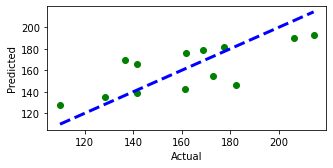

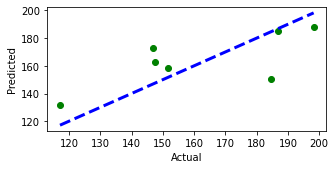

In [1279]:
plt.figure(figsize =(5,5))
plt.subplot(2,1,1)
plt.scatter(y_train,y_pred_train, c='green')
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],'k--',c='blue',lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.figure(figsize =(5,5))
plt.subplot(2,1,1)
plt.scatter(y_test,y_pred_test, c='green')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',c='blue',lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [1280]:
x = main2[["Population",'Income']]
y = main['Price']
# standardisation
scaler = StandardScaler()
x = scaler.fit_transform(x)
#adding constant
x = sm.add_constant(x)
#train test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.33,random_state=130 )

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
# creating model
model = sm.OLS(y_train,x_train)
#fitting the model
model = model.fit()
# executing model
model
#printing model summary
print(model.summary())
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

r2_train = np.abs(r2_score(y_train,y_pred_train))
print("r2_train:", r2_train)
r2_test = np.abs(r2_score(y_test, y_pred_test))
print("r2_test :", r2_test)

print(np.sqrt(mean_squared_error(y_train,y_pred_train)))
print(np.sqrt(mean_squared_error(y_test,y_pred_test)))

(13, 3)
(13,)
(7, 3)
(7,)
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     8.998
Date:                Thu, 01 Sep 2022   Prob (F-statistic):            0.00581
Time:                        02:24:55   Log-Likelihood:                -55.693
No. Observations:                  13   AIC:                             117.4
Df Residuals:                      10   BIC:                             119.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        164.4675     

Text(0, 0.5, 'Predicted')

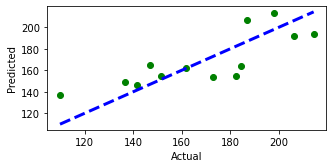

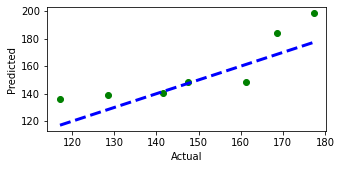

In [1281]:
plt.figure(figsize =(5,5))
plt.subplot(2,1,1)
plt.scatter(y_train,y_pred_train, c='green')
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],'k--',c='blue',lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.figure(figsize =(5,5))
plt.subplot(2,1,1)
plt.scatter(y_test,y_pred_test, c='green')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',c='blue',lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [1282]:
x = main2[["Population",'Income']]
y = main['Price']
# standardisation
scaler = StandardScaler()
x = scaler.fit_transform(x)
#adding constant
x = sm.add_constant(x)
#train test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4,random_state=134 )

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
# creating model
model = sm.OLS(y_train,x_train)
#fitting the model
model = model.fit()
# executing model
model
#printing model summary
print(model.summary())
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

r2_train = np.abs(r2_score(y_train,y_pred_train))
print("r2_train:", r2_train)
r2_test = np.abs(r2_score(y_test, y_pred_test))
print("r2_test :", r2_test)

print(np.sqrt(mean_squared_error(y_train,y_pred_train)))
print(np.sqrt(mean_squared_error(y_test,y_pred_test)))

(12, 3)
(12,)
(8, 3)
(8,)
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     6.218
Date:                Thu, 01 Sep 2022   Prob (F-statistic):             0.0201
Time:                        02:25:22   Log-Likelihood:                -51.117
No. Observations:                  12   AIC:                             108.2
Df Residuals:                       9   BIC:                             109.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        165.0304     

Text(0, 0.5, 'Predicted')

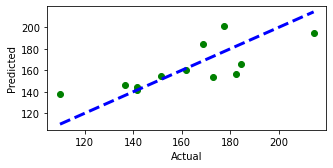

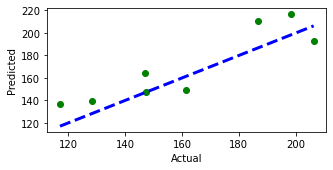

In [1283]:
plt.figure(figsize =(5,5))
plt.subplot(2,1,1)
plt.scatter(y_train,y_pred_train, c='green')
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],'k--',c='blue',lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.figure(figsize =(5,5))
plt.subplot(2,1,1)
plt.scatter(y_test,y_pred_test, c='green')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',c='blue',lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [1286]:
x = main2[["Population",'Jobless_Rate']]
y = main['Price']
# standardisation
scaler = StandardScaler()
x = scaler.fit_transform(x)
#adding constant
x = sm.add_constant(x)
#train test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state=77)
# creating model
model = sm.OLS(y_train,x_train)
#fitting the model
model = model.fit()
# executing model
model
#printing model summary
print(model.summary())

y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

r2_train = np.abs(r2_score(y_train,y_pred_train))
print("r2_train:", r2_train)
r2_test = np.abs(r2_score(y_test, y_pred_test))
print("r2_test :", r2_test)

print(np.sqrt(mean_squared_error(y_train,y_pred_train)))
print(np.sqrt(mean_squared_error(y_test,y_pred_test)))

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     11.22
Date:                Thu, 01 Sep 2022   Prob (F-statistic):            0.00147
Time:                        02:26:00   Log-Likelihood:                -68.307
No. Observations:                  16   AIC:                             142.6
Df Residuals:                      13   BIC:                             144.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        164.6351      4.818     34.168      0.0

Text(0, 0.5, 'Predicted')

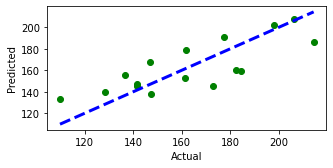

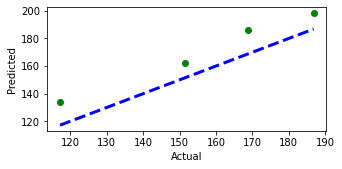

In [1287]:
plt.figure(figsize =(5,5))
plt.subplot(2,1,1)
plt.scatter(y_train,y_pred_train, c='green')
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],'k--',c='blue',lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.figure(figsize =(5,5))
plt.subplot(2,1,1)
plt.scatter(y_test,y_pred_test, c='green')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',c='blue',lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [1288]:
x = main2[["Population",'Jobless_Rate']]
y = main['Price']
# standardisation
scaler = StandardScaler()
x = scaler.fit_transform(x)
#adding constant
x = sm.add_constant(x)
#train test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.15,random_state=97)
# creating model
model = sm.OLS(y_train,x_train)
#fitting the model
model = model.fit()
# executing model
model
#printing model summary
print(model.summary())

y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

r2_train = np.abs(r2_score(y_train,y_pred_train))
print("r2_train:", r2_train)
r2_test = np.abs(r2_score(y_test, y_pred_test))
print("r2_test :", r2_test)

print(np.sqrt(mean_squared_error(y_train,y_pred_train)))
print(np.sqrt(mean_squared_error(y_test,y_pred_test)))

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     10.55
Date:                Thu, 01 Sep 2022   Prob (F-statistic):            0.00160
Time:                        02:26:29   Log-Likelihood:                -72.428
No. Observations:                  17   AIC:                             150.9
Df Residuals:                      14   BIC:                             153.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        163.4668      4.594     35.579      0.0

Text(0, 0.5, 'Predicted')

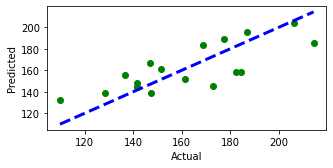

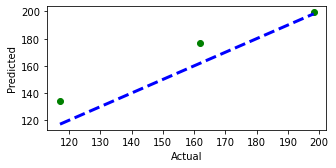

In [1291]:
plt.figure(figsize =(5,5))
plt.subplot(2,1,1)
plt.scatter(y_train,y_pred_train, c='green')
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],'k--',c='blue',lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.figure(figsize =(5,5))
plt.subplot(2,1,1)
plt.scatter(y_test,y_pred_test, c='green')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',c='blue',lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')


# XGB MODELS

In [1482]:
X = main2[["Population", "Income", "Change", "GDP_Growth", 'Jobless_Rate',"Price"]]
y = main['Price']

In [1483]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [1490]:
# printing the default parameters of XGBoostmodel.
xgb.XGBRegressor().get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [1491]:
# we initiate the regression model and train it with our train data
xg_reg = xgb.XGBRegressor()

# training the model
xg_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [1492]:
# predicting the outputs
xgb_preds = xg_reg.predict(X_test)

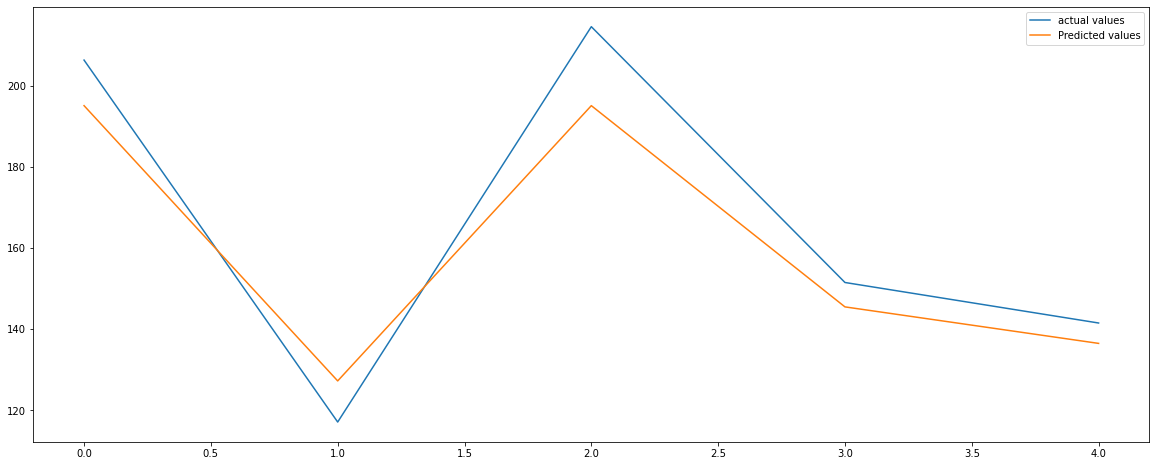

In [1493]:
import matplotlib.pyplot as plt

# fitting the size of the plot
plt.figure(figsize=(20, 8))

# plotting the graphs
plt.plot([i for i in range(len(y_test))],y_test, label="actual values")
plt.plot([i for i in range(len(y_test))],xgb_preds, label="Predicted values")

# showing the plotting
plt.legend()
plt.show()

In [1494]:
# Evaluating the model
print('R score is :', r2_score(y_test, xgb_preds))
print(np.sqrt(mean_squared_error(y_test, xgb_preds)))

R score is : 0.9068520348644497


In [1495]:
# function to print the total time
def timer(start_time=None):

    # starting the time
    if not start_time:
        start_time = datetime.now()
        return start_time
    # ending the time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)

        # printing the total time
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [1496]:
# defining the paramters and their values
params={'n_estimators':range(1,50), 
        'learning_rate':[0.1, 0.2, 0.4, 0.6],
        'max_depth':[2, 4, 5, 6, 8]}

Searching for optimal XGBoost parameters

In [1497]:
# importing required module
from sklearn.model_selection import GridSearchCV
from datetime import datetime

# initializing the model
model=xgb.XGBRegressor()

# applying GridSearchCV
grid=GridSearchCV(estimator=model,cv=2,param_grid=params,scoring='neg_mean_squared_error')

# timing starts from this point for "start_time" variable
start_time = timer(None) 

# training the model
grid.fit(X_train,y_train)

# timing ends here for "start_time" variable
timer(start_time) 

# printing the best estimator
print("\nThe best estimator returned by GridSearch CV is:",grid.best_estimator_)


 Time taken: 0 hours 1 minutes and 3.62 seconds.

The best estimator returned by GridSearch CV is: XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.6, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)


Training the model

In [1500]:
# optimum parameters
xg_reg = xgb.XGBRegressor( base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='merror', gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.6, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

# training the model
xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='merror', gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.6, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [1501]:
# making predictions 
preds = xg_reg.predict(X_test)

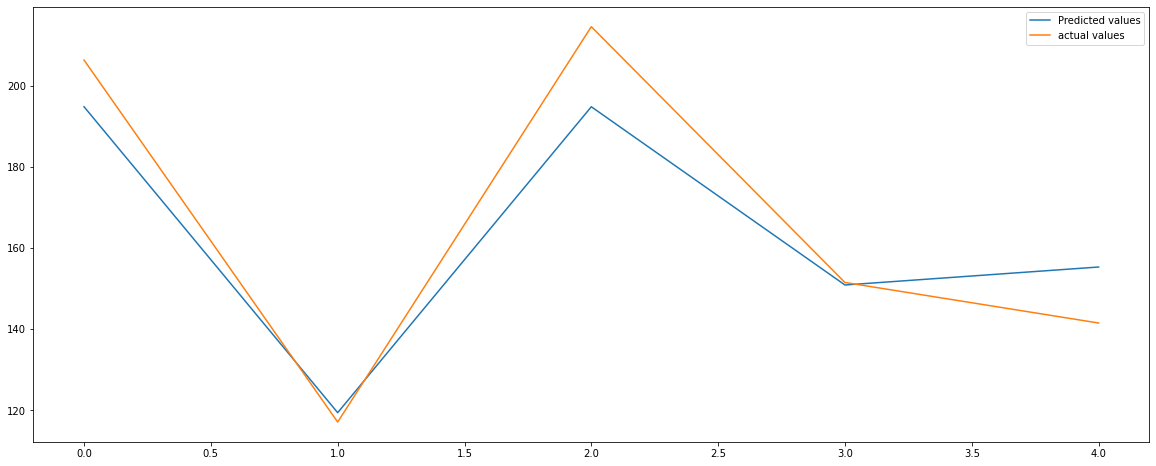

In [1502]:
# fitting the size of the plot
plt.figure(figsize=(20, 8))

# plotting the graphs
plt.plot([i for i in range(len(y_test))],preds, label="Predicted values")
plt.plot([i for i in range(len(y_test))],y_test, label="actual values")
plt.legend()
plt.show()

In [1503]:
# Evaluating the model
print('R score is :', r2_score(y_test, preds))
print(np.sqrt(mean_squared_error(y_test, xgb_preds)))

R score is : 0.9000203396348503


Model with all features

In [1505]:
X = main[['Year', 'Population', 'population_density', 'Unemployment', 'Income',
       'Change', 'GDP_Growth', 'Jobless_Rate']]
y = main['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

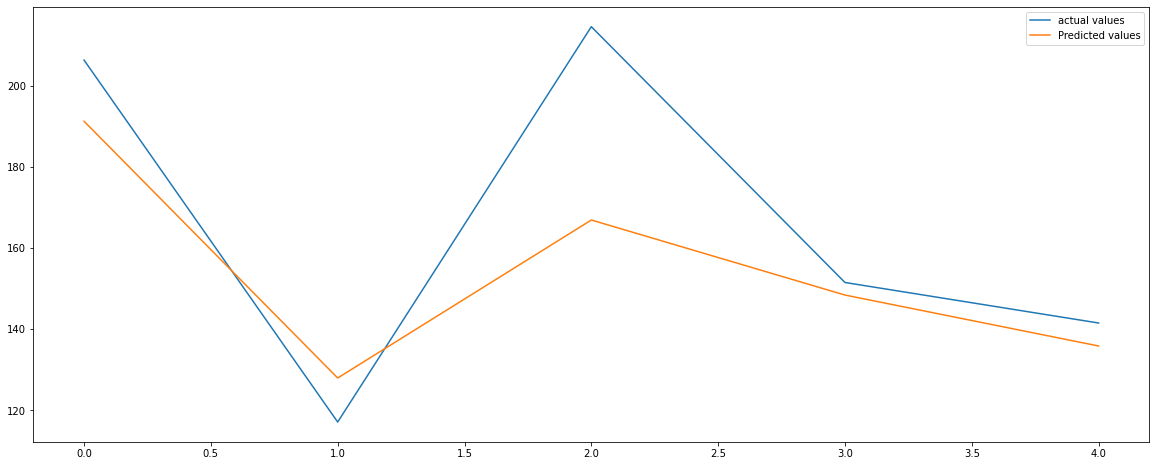

R score is : 0.6300689790757139

 Time taken: 0 hours 0 minutes and 50.55 seconds.

The best estimator returned by GridSearch CV is: XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=48, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)


In [1508]:
# printing the default parameters of XGBoostmodel.
xgb.XGBRegressor().get_params()

# we initiate the regression model and train it with our train data
xg_reg = xgb.XGBRegressor()

# training the model
xg_reg.fit(X_train,y_train)

# predicting the outputs
xgb_preds = xg_reg.predict(X_test)

import matplotlib.pyplot as plt

# fitting the size of the plot
plt.figure(figsize=(20, 8))

# plotting the graphs
plt.plot([i for i in range(len(y_test))],y_test, label="actual values")
plt.plot([i for i in range(len(y_test))],xgb_preds, label="Predicted values")

# showing the plotting
plt.legend()
plt.show()

# Evaluating the model
print('R score is :', r2_score(y_test, xgb_preds))
print(np.sqrt(mean_squared_error(y_test, xgb_preds)))

# function to print the total time
def timer(start_time=None):

    # starting the time
    if not start_time:
        start_time = datetime.now()
        return start_time
    # ending the time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)

        # printing the total time
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

# defining the paramters and their values
params={'n_estimators':range(1,50), 
        'learning_rate':[0.1, 0.2, 0.4, 0.6],
        'max_depth':[2, 4, 5, 6, 8]}

#Searching for optimal XGBoost parameters

# importing required module
from sklearn.model_selection import GridSearchCV
from datetime import datetime

# initializing the model
model=xgb.XGBRegressor()

# applying GridSearchCV
grid=GridSearchCV(estimator=model,cv=2,param_grid=params,scoring='neg_mean_squared_error')

# timing starts from this point for "start_time" variable
start_time = timer(None) 

# training the model
grid.fit(X_train,y_train)

# timing ends here for "start_time" variable
timer(start_time) 

# printing the best estimator
print("\nThe best estimator returned by GridSearch CV is:",grid.best_estimator_)

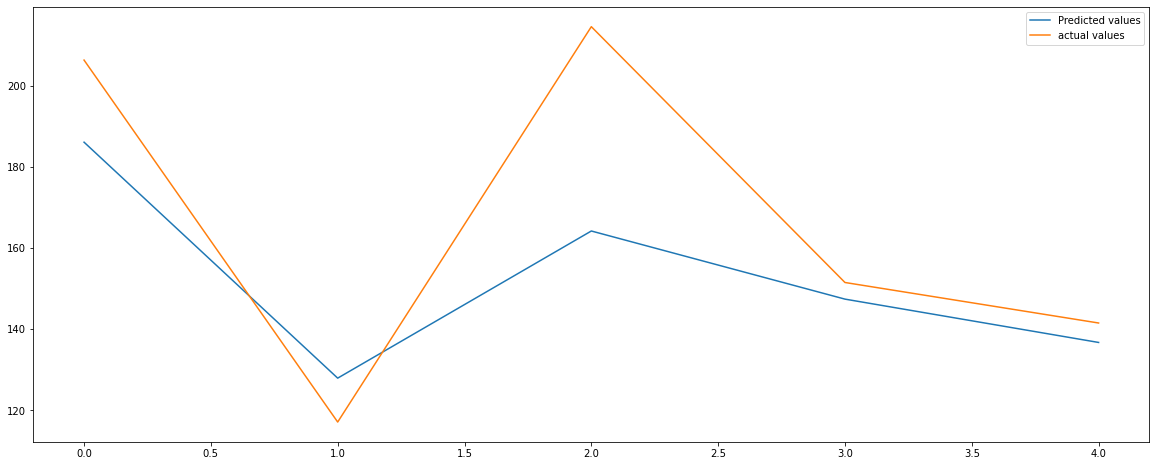

R score is : 0.5680986864294528


In [1509]:
# optimum parameters
xg_reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='merror', gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             monotone_constraints='()', n_estimators=48, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

# training the model
xg_reg.fit(X_train, y_train)

# making predictions 
preds = xg_reg.predict(X_test)

# fitting the size of the plot
plt.figure(figsize=(20, 8))

# plotting the graphs
plt.plot([i for i in range(len(y_test))],preds, label="Predicted values")
plt.plot([i for i in range(len(y_test))],y_test, label="actual values")
plt.legend()
plt.show()

# Evaluating the model
print('R score is :', r2_score(y_test, preds))
print(np.sqrt(mean_squared_error(y_test, xgb_preds)))

In [1537]:
X = main2[["Population",'Jobless_Rate']]
y = main['Price']

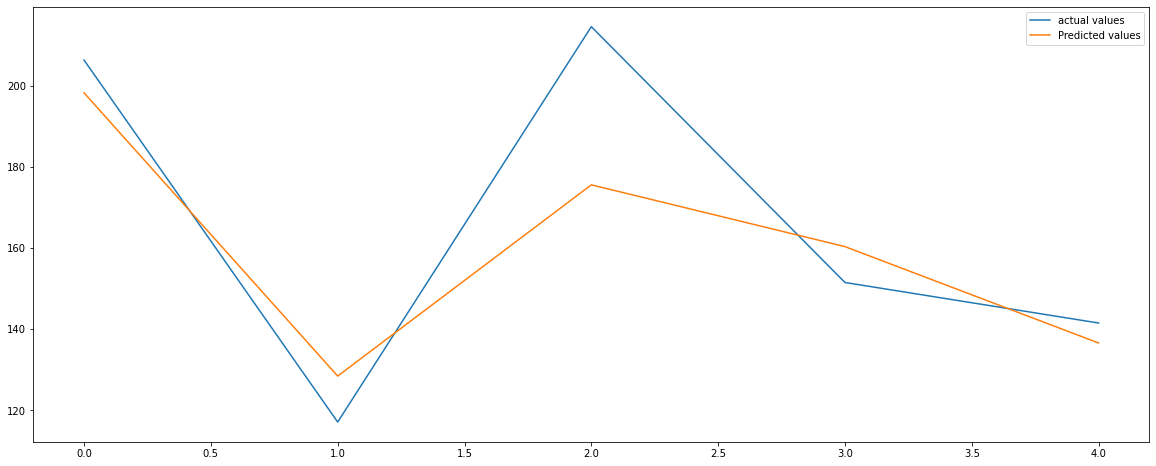

R score is : 0.7472530546715099
19.035942487180364

 Time taken: 0 hours 0 minutes and 45.0 seconds.

The best estimator returned by GridSearch CV is: XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=49, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)


In [1538]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# printing the default parameters of XGBoostmodel.
xgb.XGBRegressor().get_params()

# we initiate the regression model and train it with our train data
xg_reg = xgb.XGBRegressor()

# training the model
xg_reg.fit(X_train,y_train)

# predicting the outputs
xgb_preds = xg_reg.predict(X_test)

import matplotlib.pyplot as plt

# fitting the size of the plot
plt.figure(figsize=(20, 8))

# plotting the graphs
plt.plot([i for i in range(len(y_test))],y_test, label="actual values")
plt.plot([i for i in range(len(y_test))],xgb_preds, label="Predicted values")

# showing the plotting
plt.legend()
plt.show()

# Evaluating the model
print('R score is :', r2_score(y_test, xgb_preds))
print(np.sqrt(mean_squared_error(y_test, xgb_preds)))


# function to print the total time
def timer(start_time=None):

    # starting the time
    if not start_time:
        start_time = datetime.now()
        return start_time
    # ending the time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)

        # printing the total time
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

# defining the paramters and their values
params={'n_estimators':range(1,50), 
        'learning_rate':[0.1, 0.2, 0.4, 0.6],
        'max_depth':[2, 4, 5, 6, 8]}

#Searching for optimal XGBoost parameters

# importing required module
from sklearn.model_selection import GridSearchCV
from datetime import datetime

# initializing the model
model=xgb.XGBRegressor()

# applying GridSearchCV
grid=GridSearchCV(estimator=model,cv=2,param_grid=params,scoring='neg_mean_squared_error')

# timing starts from this point for "start_time" variable
start_time = timer(None) 

# training the model
grid.fit(X_train,y_train)

# timing ends here for "start_time" variable
timer(start_time) 

# printing the best estimator
print("\nThe best estimator returned by GridSearch CV is:",grid.best_estimator_)

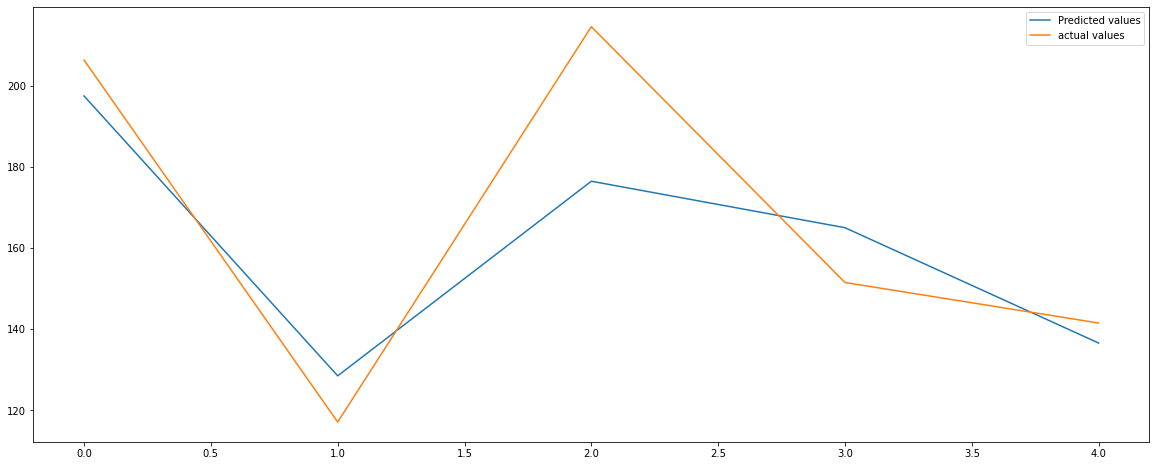

R score is : 0.7402605279979985
19.29747126694819


In [1542]:
# optimum parameters
xg_reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmse', gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             monotone_constraints='()', n_estimators=49, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

# training the model
xg_reg.fit(X_train, y_train)

# making predictions 
preds = xg_reg.predict(X_test)

# fitting the size of the plot
plt.figure(figsize=(20, 8))

# plotting the graphs
plt.plot([i for i in range(len(y_test))],preds, label="Predicted values")
plt.plot([i for i in range(len(y_test))],y_test, label="actual values")
plt.legend()
plt.show()

# Evaluating the model
print('R score is :', r2_score(y_test, preds))
print(np.sqrt(mean_squared_error(y_test, preds)))

<!-- OLS regression models with random state on.

Model 1 with ["Population"]
r2_train: 0.4803904988635389
r2_test : 0.5796324990165962
RMSE train : 20.210925211236173
RMSE test : 18.332893787072525

Model 2 with ["Population"]
r2_train: 0.5341274408795951
r2_test : 0.5139210127354052
RMSE train : 19.72160914265754
RMSE test : 18.628615006593765

Model 3 with ["Population",'Income']
r2_train: 0.6428063815746197
r2_test : 0.5344919453475752
RMSE train : 17.552153547718305
RMSE test : 13.722982748508107

Model 4 with ["Population",'Income']
r2_train: 0.580137027412445
r2_test : 0.7291133250391304
RMSE train : 17.129456635249593
RMSE test : 15.897556032568342

Model 5 with ["Population",'Jobless_Rate']
r2_train: 0.633271141880762
r2_test : 0.6793092049634344
RMSE train : 17.292081962370663
RMSE test : 14.544646713078786

Model 6 with ["Population",'Jobless_Rate']
r2_train: 0.6012464390570026
r2_test : 0.84355981671861
RMSE train : 17.142092166408407
RMSE test : 13.112896454310881

XG boost models are not better than the model 6 as they show higher RMSE than model 6.

MODEL 5 and 6 are best models.
Model 6 generalises the best and shows 84% variablility in test data as compared to Model 5 which shows 63% of variablity
Model 6 have less RMSE value of 13.11 as compared to Model 5 with RMSE value of 14.54 
 -->

# OLS regression models with random state on.



# Model 1 with ["Population"]
# r2_train: 0.4803904988635389
# r2_test : 0.5796324990165962
# RMSE train : 20.210925211236173
# RMSE test : 18.332893787072525



----------------------------------------------------------
# Model 2 with ["Population"]
# r2_train: 0.5341274408795951
# r2_test : 0.5139210127354052
# RMSE train : 19.72160914265754
# RMSE test : 18.628615006593765



----------------------------------------------------------
# Model 3 with ["Population",'Income']
# r2_train: 0.6428063815746197
# r2_test : 0.5344919453475752
# RMSE train : 17.552153547718305
# RMSE test : 13.722982748508107



----------------------------------------------------------
# Model 4 with ["Population",'Income']
# r2_train: 0.580137027412445
# r2_test : 0.7291133250391304
# RMSE train : 17.129456635249593
# RMSE test : 15.897556032568342



-----------------------------------------------------------------------
# Model 5 with ["Population",'Jobless_Rate']
# r2_train: 0.633271141880762
# r2_test : 0.6793092049634344
# RMSE train : 17.292081962370663
# RMSE test : 14.544646713078786



----------------------------------------------------------------------
# Model 6 with ["Population",'Jobless_Rate']
# r2_train: 0.6012464390570026
# r2_test : 0.84355981671861
# RMSE train : 17.142092166408407
# RMSE test : 13.112896454310881



------------------------------------------------------------------------
# XG boost models are not better than the model 6 as they show higher RMSE than model 6.



----------------------------------------------------------
# MODEL 5 and 6 are best models.


-----------------------------------------------------------------
# Model 6 generalises the best and shows 84% variablility in test data as compared to Model 5 which shows 63% of variablity


---------------------------------------------------------------
# Model 6 have less RMSE value of 13.11 as compared to Model 5 with RMSE value of 14.54 


-------------------------------------------------------------------
# FINAL MODEL SELECTED IS MODEL 6